<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAD2 lab 9**: Expectation-Maximization for Gaussian Mixtures
*Justyna Król, Barbara Domżał, Kazik Oksza-Orzechowski*

## Mixture Models

A mixture model is a probability model in which the overall density (or mass) function is expressed as a weighted sum of $K$ component distributions. The mixture density is defined as

$$
f(x) = \sum_{k=1}^{K} \pi_k\, f_k(x; \theta_k),
$$

where:

- $f(x)$ is the overall density or mass function of the mixture model.
- $K$ is the number of component distributions in the mixture.
- $f_k(x; \theta_k)$ is the density or mass function of the $k$-th component distribution, parametrized by $\theta_k$.
- $\pi_k$ is the mixing weight of the $k$-th component, with $0 \le \pi_k \le 1$ and $\sum_{k=1}^{K} \pi_k = 1$. The value $\pi_k$ is also called the prior probability of component $k$.
- $\theta_k$ represents the parameters of the $k$-th component, such as the mean and variance in the case of Gaussian components.

## Gaussian Mixture Models (GMM)

A **Gaussian mixture model (GMM)** is a widely used mixture model in which the probability density is expressed as a weighted sum of Gaussian (Normal) distributions:

$$
f(x) = \sum_{k=1}^{K} \pi_k \, N(x; \mu_k, \Sigma_k),
$$

where:

- $x$ is a $d$-dimensional vector.
- $\mu_k$ is the mean vector of the $k$-th Gaussian component.
- $\Sigma_k$ is the covariance matrix of the $k$-th Gaussian component.
- $N(x; \mu_k, \Sigma_k)$ is the $d$-dimensional multivariate Normal density function for component $k$.



## The Dreadful Mouse

The Mouse is a specially constructed probability distribution designed to look cute, sound cute, and completely destroy the k-means algorithm. It's a mixture of three Normal distributions on a 2-dimentional space.

- The head of the mouse is centered at the origin.
- The ears are centered at $(-1, 1)$ and $(1, 1)$.
- Both ears share a common standard deviation $\sigma_E$, which is smaller than the head's standard deviation $\sigma_H$.

A simulated point belongs to the head with probability $p$, and otherwise to one of the ears with probability $(1 - p) / 2$ each.

Formally, let $M = (X, Y)$ be a random observation from the Mouse distribution, and let $f_M(x, y)$ denote its two-dimensional probability density. Let $H$ denote a random point from the head, and $E_L$ and $E_R$ denote random points from the left and right ears, respectively. Then the components are defined as:

$$
H \sim N\!\left(
\begin{pmatrix}
0 \\[2pt] 0
\end{pmatrix}, \sigma_H^2 I \right),
$$

$$
E_L \sim N\!\left(
\begin{pmatrix}
-1 \\[2pt] 1
\end{pmatrix}, \sigma_E^2 I \right),
$$

$$
E_R \sim N\!\left(
\begin{pmatrix}
1 \\[2pt] 1
\end{pmatrix}, \sigma_E^2 I \right).
$$

The mixture density of the Mouse distribution is then

$$
f_M(x, y) = p \, f_H(x, y) + \frac{1 - p}{2} \, f_{E_L}(x, y) + \frac{1 - p}{2} \, f_{E_R}(x, y),
$$

where $p \in (0,1)$ is the probability that a point originates from the head.

This formulation follows the general structure of a mixture model, where $f_M(x, y)$ is the overall density, the components $f_H$, $f_{E_L}$, $f_{E_R}$ are Gaussian densities, and the mixing weights are $p$ and $(1-p)/2$.


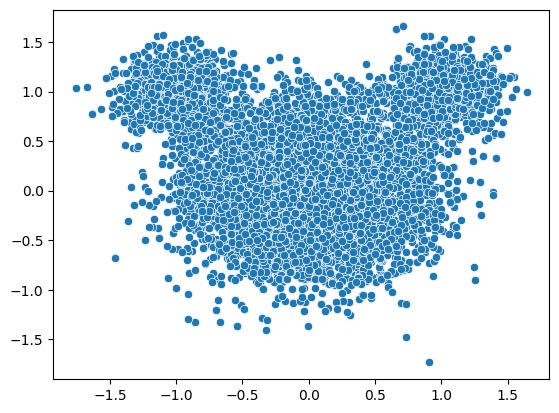

**Figure 1.** 10000 points from a Mouse distribution with parameters $p = 0.8,\sigma_H = 0.4, \sigma_E = 0.2.$

## Mouse as a Bayesian Network

We can easily represent a general Mouse distribution using a Bayesian Network:

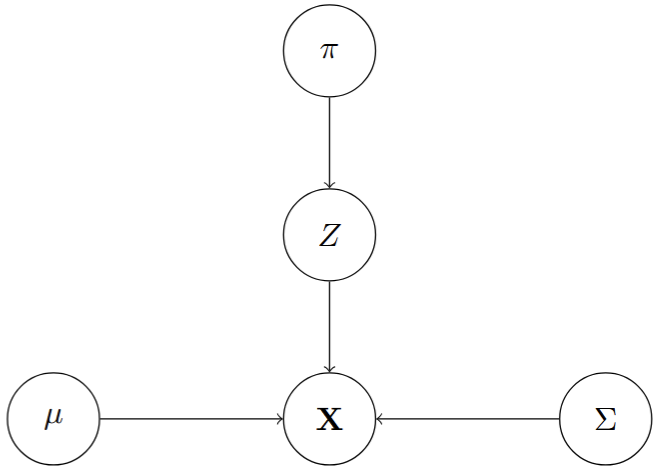




## EM Algorithm for the Mouse

Assume we have observed $N$ points from the Mouse distribution with unknown parameters. Let us index the points by $n = 1, 2, \dots, N$, and let the underlying Gaussian components (head, left ear, right ear) be indexed by $k = 1, 2, 3$. We aim to estimate the unknown parameters using the EM algorithm, which iterates the following two steps.


### Notation

- $\mathbf{x}_n$: the $n$-th observed data point.  
- $z(\mathbf{x}_n)$: a latent random variable representing the component from which $\mathbf{x}_n$ originates, taking values in $\{1, 2, 3\}$.  
- $\gamma_{n,k} := P(z(\mathbf{x}_n) = k \mid \mathbf{x}_n)$: the soft component memberships (also called responsibilities) of component $k$ for point $\mathbf{x}_n$.  
- $\pi_k := P(z=k)$: the mixing weight (prior probability) of component $k$.  
- $\mu_k$: the mean vector of component $k$.  
- $\Sigma_k$: the covariance matrix of component $k$.  
- $N(\mathbf{x}_n; \mu_k, \Sigma_k)$: the multivariate normal density of component $k$ evaluated at $\mathbf{x}_n$.  


### Expectation Step

Compute the responsibilities for each data point:

$$
\gamma_{n,k} = P(z(\mathbf{x}_n) = k \mid \mathbf{x}_n)
$$

From Bayes' theorem:

$$
\gamma_{n,k}
= \frac{P(\mathbf{x}_n \mid z(\mathbf{x}_n) = k)\, \pi_k}{\sum_{j=1}^{K} P(\mathbf{x}_n \mid z(\mathbf{x}_n) = j)\, \pi_j}.
$$

For the Mouse distribution:

$$
\mathbf{x}_n = (x_n, y_n), \quad
\pi = (p, \frac{1-p}{2}, \frac{1-p}{2}),
$$

$$
P(\mathbf{x}_n \mid z(\mathbf{x}_n) = 1) = N\Big(
\begin{pmatrix}0\\0\end{pmatrix}, \sigma_H^2 I \Big)(\mathbf{x}_n),
$$

$$
P(\mathbf{x}_n \mid z(\mathbf{x}_n) = 2) = N\Big(
\begin{pmatrix}-1\\1\end{pmatrix}, \sigma_E^2 I \Big)(\mathbf{x}_n),
$$

$$
P(\mathbf{x}_n \mid z(\mathbf{x}_n) = 3) = N\Big(
\begin{pmatrix}1\\1\end{pmatrix}, \sigma_E^2 I \Big)(\mathbf{x}_n).
$$


### Maximization Step

Update the parameters using the responsibilities:

1. **Mixing weights**:

$$
\pi_k^{\text{new}} = \frac{1}{N} \sum_{n=1}^{N} \gamma_{n,k}.
$$

2. **Means**:

$$
\mu_k^{\text{new}} = \frac{\sum_{n=1}^{N} \gamma_{n,k} \, \mathbf{x}_n}{\sum_{n=1}^{N} \gamma_{n,k}}.
$$

3. **Covariance matrices**:

$$
\Sigma_k^{\text{new}} = \frac{\sum_{n=1}^{N} \gamma_{n,k} \, (\mathbf{x}_n - \mu_k^{\text{new}})(\mathbf{x}_n - \mu_k^{\text{new}})^\mathsf{T}}{\sum_{n=1}^{N} \gamma_{n,k}}.
$$


## LogSumExp Trick

Define the unnormalized probabilities:

$$
l'_{n,k} := P(\mathbf{x}_n \mid z(\mathbf{x}_n) = k) \, \pi_k.
$$

For log-probabilities:

$$
\log l'_{n,k} = \log \Big( P(\mathbf{x}_n \mid z(\mathbf{x}_n) = k) \, \pi_k \Big)
= \log N(\mathbf{x}_n; \mu_k, \Sigma_k) + \log \pi_k.
$$

Normalize the probabilities:

$$
l_{n,k} = \frac{l'_{n,k}}{\sum_{j=1}^{K} l'_{n,j}}, \quad
\log l_{n,k} = \log l'_{n,k} - \log \sum_{j=1}^{K} \exp(\log l'_{n,j}).
$$

For numerical stability, use the **LogSumExp** trick:

$$
\text{LogSumExp}(v) = \log \Big( \sum_j \exp(v_j - \max(v)) \Big) + \max(v).
$$


## Exercise

1. Sample 10000 points from the Mouse distribution with parameters $p=0.8, \sigma_H=0.4, \sigma_E=0.2$.

2. Run k-means clustering on your sample. Visualise the results.

3. Implement the EM algorithm for the Mouse.

4. Run the EM algorithm on your sample. Visualise results.

In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

7984 1013 1003
tensor([[ 0.1973,  0.1403,  0.3617,  ...,  0.8013,  0.9815,  1.1514],
        [ 0.2519,  0.1181, -0.4844,  ...,  1.1157,  1.2973,  1.3507]])


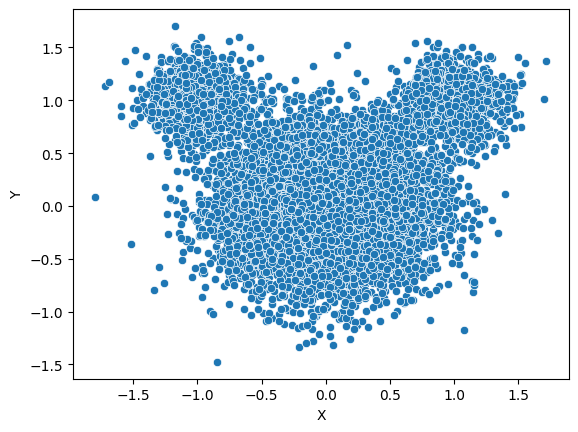

In [12]:
# Sample 10000 points from the Mouse dostribution

# TODO
n=10000
p1=0.8
p2=0.1
p3=0.1
m1 = torch.tensor([0., 0.])
m2 = torch.tensor([-1., 1.])
m3 = torch.tensor([1., 1.])
cov1 = torch.tensor([[0.16, 0.], [0., 0.16]])
cov2 = torch.tensor([[0.04, 0.], [0., 0.04]])
cov3 = torch.tensor([[0.04, 0.], [0., 0.04]])
MN1 = torch.distributions.MultivariateNormal(m1, cov1)
MN2 = torch.distributions.MultivariateNormal(m2, cov2)
MN3 = torch.distributions.MultivariateNormal(m3, cov3)
l1 = 0
l2=0
l3=0
for i in range(n):
  r = torch.rand(1)
  if r<=p1:
    l1+=1
  elif r<=p1+p2:
    l2+=1
  else:
    l3+=1
print(l1,l2,l3)
sample1 = MN1.expand(batch_shape = torch.Size([l1])).sample()
sample2 = MN2.expand(batch_shape = torch.Size([l2])).sample()
sample3 = MN3.expand(batch_shape = torch.Size([l3])).sample()
sample = torch.cat([sample1, sample2, sample3])
sampleT = sample.T
print(sampleT)

# Plot points
sns.scatterplot(x=sampleT[0], y=sampleT[1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

KMeans(n_clusters=3)


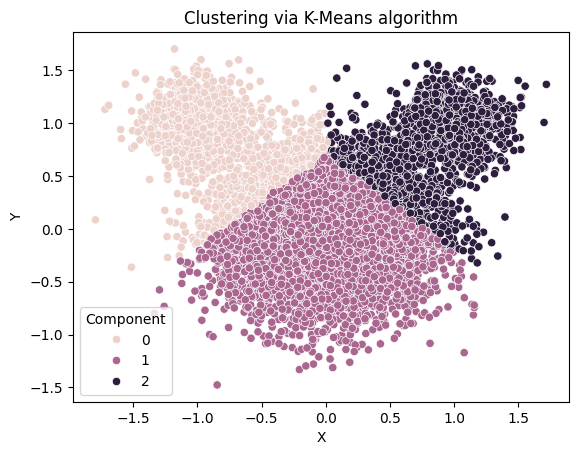

In [18]:
# run k-means
import sklearn
from sklearn.cluster import KMeans

km_assignment = sklearn.cluster.KMeans(n_clusters=3).fit(sample)
print(km_assignment)

sns.scatterplot(x=sampleT[0], y=sampleT[1], hue=km_assignment.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clustering via K-Means algorithm")
plt.legend(title='Component')
plt.show()

In [ ]:
import numpy as np

# Helper: function for calculating an optimal covariance matrix
# xy_coords: 2-dim tensor with point coordinates
# mu: 1-dim tensor, center of a cluster/component
# probabilities: 1-dim tensor, probabilities of points belonging to the components
# returns: 2-dim tensor, best covariance matrix for the cluster
def compute_covariance(xy_coords, mu, responsibilities):
    """
    Compute the weighted covariance matrix for one component.
    """
    # Center data
    centered = xy_coords - mu  # shape: (N, 2)

    # Compute weighted outer products
    weighted_outer = torch.einsum('ni,nj,n->ij', centered, centered, responsibilities)

    # Normalize by total responsibility sum
    cov_matrix = weighted_outer / responsibilities.sum()

    return cov_matrix


def initialize_gmm(points, n=3):
    """
    Initialize GMM parameters: means, covariances, and mixing weights.
    """
    # TODO
    cov = np.array([[1,0],[0,1]])
    weight = 1/n
    cov_init = []
    weights_init =[]
    mu_init = []
    for i in range(n):
      cov_init.append(cov)
      weights_init.append(weight)
      mu_init.append(points[i])
    cov_init = torch.tensor(cov_init)
    weights_init = torch.tensor(weights_init)
    mu_init = torch.tensor(mu_init)

    return mu_init, cov_init, weights_init


# E-step: compute responsibilities
def expectation_step(points,n):
    """
    Compute log-posterior responsibilities for each point and component.
    Returns log responsibilities (log posterior probabilities).
    """
    # TODO

    return log_responsibilities  # shape: (K, N)


# M-step: update parameters
def maximization_step(...):
    """
    Update GMM parameters: means, covariances, and mixing weights.
    """
    # TODO

    return mu_new, cov_new, weights_new

Learned component means (mu):
 tensor([[ 0.9933,  0.9967],
        [-1.0004,  1.0018],
        [-0.0026, -0.0039]])

Learned covariance matrices (cov):
 tensor([[[ 0.0417, -0.0014],
         [-0.0014,  0.0379]],

        [[ 0.0408,  0.0013],
         [ 0.0013,  0.0412]],

        [[ 0.1604,  0.0010],
         [ 0.0010,  0.1617]]])

Learned mixing weights:
 tensor([0.1007, 0.1031, 0.7962])


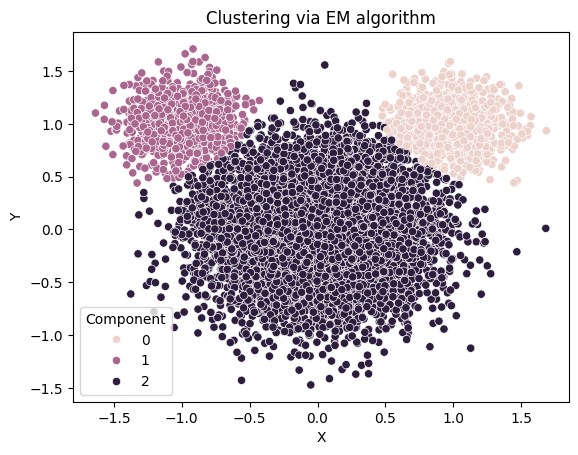

In [ ]:
# Parameters
MAX_ITER = 100
N_COMPONENTS = 3


# Initialize GMM parameters
mu, cov, weights = initialize_gmm(sample[:3], 3)


# EM Algorithm
for iteration in range(MAX_ITER):
    # E-step: compute log responsibilities
    ...

    # M-step: update parameters
    ...


# Print learned parameters
print("Learned component means (mu):\n", ...)
print("\nLearned covariance matrices (cov):\n", ...)
print("\nLearned mixing weights:\n", ...)


# Assign each point to the most likely component
assignments = ...


# Visualize clusters
sns.scatterplot(
    x=...,
    y=...,
    hue=assignments
)
plt.title("Clustering via EM algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title='Component')
plt.show()